<a href="https://colab.research.google.com/github/Pawan300/Time-Series-data-analysis/blob/master/time_series_BHEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [0]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/time series/BHEL.NS.csv")
data=data.dropna()

In [0]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,5.73333,5.88333,5.73333,5.88333,0.347170,1501500.0
1,1996-01-02,5.88333,5.61667,5.61667,5.61667,0.331434,1500.0
2,1996-01-03,5.61667,5.70000,5.60333,5.70000,0.336352,4500.0
3,1996-01-04,5.70000,5.60000,5.60000,5.60000,0.330451,1500.0
4,1996-01-05,5.60000,5.70000,5.53333,5.70000,0.336352,1438500.0


In [0]:
d={}
for i in range(data.shape[0]):
  j=data['Date'].iloc[i].split("-")
  if(j[0]+'-'+j[1] in d.keys()):
    d[j[0]+'-'+j[1]]+=data['Open'].iloc[i]
  else:
    d[j[0]+'-'+j[1]]=data['Open'].iloc[i]
for i in d.keys():
  d[i]=d[i]/30

In [0]:
df=pd.DataFrame({'Date':list(d.keys()),'Open':list(d.values())})

In [0]:
df.to_csv("/content/drive/My Drive/Colab Notebooks/time series/datafile.csv")

In [0]:
df.set_index('Date', inplace=True)

In [0]:
np.std(df)

Open    66.05915
dtype: float64

In [0]:
df.head()

,Open
Date,
1996-01,3.804667
1996-02,4.592889
1996-03,4.839000
1996-04,7.231664
1996-05,9.382107


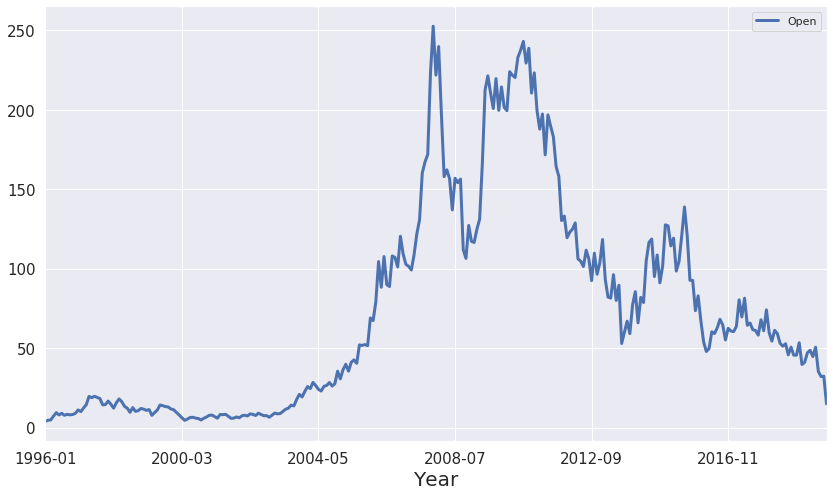

In [0]:
df.plot(figsize=(14,8),linewidth=3,fontsize=15)
plt.xlabel('Year',fontsize=20);

# Removing Seasonality

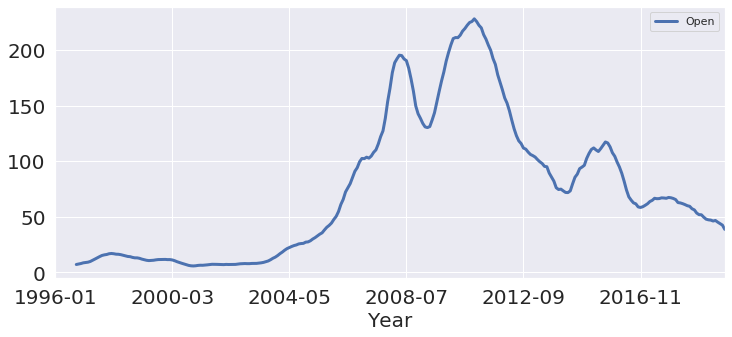

In [0]:
df.rolling(10).mean().plot(figsize=(12,5), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Removing Trend

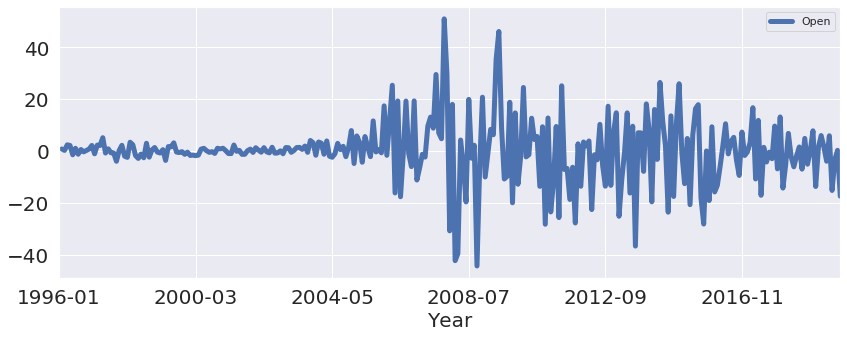

In [0]:
df.diff().plot(figsize=(14,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# AR model

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()
sc.fit(x.values.reshape(-1,1))
y=sc.transform(x.values.reshape(-1,1))

In [0]:
train,test=train_test_split(y,train_size=0.8,random_state=2)
model=AR(train)
model_fit=model.fit()

In [0]:
model_fit.k_ar

15

In [0]:
model_fit.params

array([-0.05896711,  0.11461257, -0.02781628, -0.15929061, -0.00413298,
        0.02718052, -0.10922659, -0.0573905 ,  0.01577114, -0.16018188,
        0.02129072, -0.02882241, -0.017635  , -0.08372528, -0.00370547,
       -0.01427569])

In [0]:
prediction=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
mean_squared_error(prediction,test)

1.2695000660904068

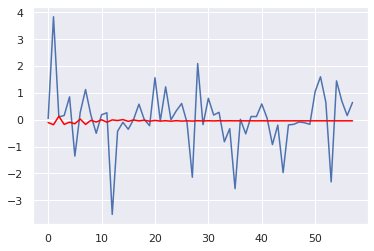

In [0]:
plt.plot(test)
plt.plot(prediction, color='red')
plt.show()

### Yule Walker

In [0]:
from statsmodels.regression.linear_model import yule_walker

In [0]:
param=yule_walker(x,order=5,method='mle')

In [0]:
param

(array([-0.08687052,  0.09320513,  0.11151227, -0.10997591, -0.06492007]),
 11.745914417817504)

### ARIMA

In [0]:
acf(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([1.        , 0.98032364, 0.96446886, 0.94611695, 0.92471574,
       0.90794461, 0.8917042 , 0.87047321, 0.85291754, 0.83588488,
       0.81919919, 0.8043837 , 0.78888947, 0.77177848, 0.75838201,
       0.74106668, 0.72790943, 0.7221426 , 0.71187908, 0.70398395,
       0.69432622, 0.67782947, 0.66449741, 0.65205547, 0.63572796,
       0.61940331, 0.60376779, 0.58735036, 0.57460403, 0.56315418,
       0.54965439, 0.53827604, 0.52515539, 0.51224739, 0.49845362,
       0.48162077, 0.46502702, 0.44711624, 0.42971697, 0.4121937 ,
       0.39943554])

In [0]:
pacf(df)

array([ 1.        ,  0.98375134,  0.10766393, -0.07504894, -0.12539581,
        0.11823655,  0.05537802, -0.18208189,  0.03880767,  0.07584407,
        0.03253517, -0.02035495, -0.02689218, -0.03056387,  0.09296362,
       -0.11771712,  0.09083488,  0.28663107, -0.09729856, -0.06690255,
       -0.08312814, -0.13163163,  0.01782478,  0.018729  , -0.07576997,
       -0.08510793,  0.06910983,  0.07032087,  0.01764756,  0.01213496,
       -0.04715283,  0.0039577 ,  0.02996412,  0.0177848 , -0.15391363,
       -0.10356822, -0.07440875, -0.14288517,  0.09581656, -0.0111916 ,
        0.16973703])

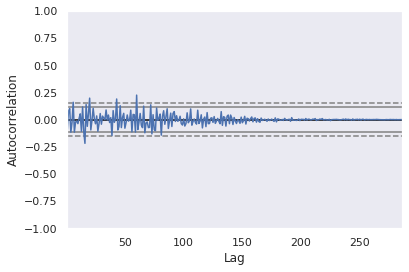

In [0]:
pd.plotting.autocorrelation_plot(x)

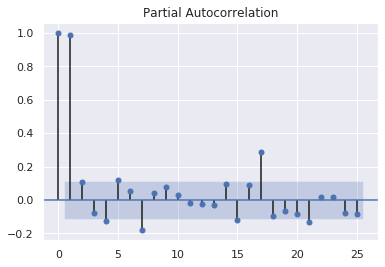

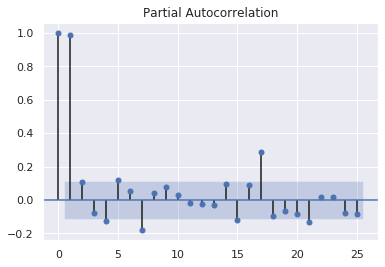

In [0]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)

In [0]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [0]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					
					best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
'''# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')'''
series = df
# evaluate parameters
p_values = [ 1, 2, 3, 4, 5]
d_values = range(0, 1)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(1, 0, 1) MSE=150.735
ARIMA(1, 0, 2) MSE=150.620
ARIMA(1, 0, 3) MSE=158.959
ARIMA(1, 0, 4) MSE=154.252
ARIMA(1, 0, 5) MSE=155.440
ARIMA(2, 0, 1) MSE=149.820
ARIMA(2, 0, 2) MSE=153.343
ARIMA(2, 0, 3) MSE=159.080
ARIMA(2, 0, 4) MSE=154.692
ARIMA(2, 0, 5) MSE=155.972
ARIMA(3, 0, 1) MSE=152.003
ARIMA(4, 0, 1) MSE=158.786
ARIMA(5, 0, 1) MSE=160.091
Best ARIMA(5, 0, 1) MSE=160.091


## Simulating

In [0]:
c=3
phi=0.44
a=np.zeros(100)
a[0]=2
for i in range(1,100):
  a[i]=c+phi*a[i-1]+np.random.randn()

In [0]:
adfuller(a)

(-8.217663484722157,
 6.557443211659845e-13,
 0,
 99,
 {'1%': -3.498198082189098,
  '10%': -2.5825959973472097,
  '5%': -2.891208211860468},
 258.9688909784096)

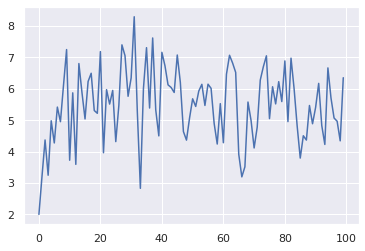

In [0]:
plt.plot(a)

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
model = ARIMA(a, order=(1,0,0))
model_fit = model.fit(disp=0)

In [0]:
model_fit.params

array([5.47653227, 0.24326333])

In [0]:
c=2
phi1=0.40
phi2=0.22
a=np.zeros(100)
a[0]=2
for i in range(1,100):
  a[i]=c+phi1*a[i-2]+phi2*a[i-1]+np.random.randn()

In [0]:
adfuller(a)

(-4.542686333513388,
 0.00016451600066703825,
 1,
 98,
 {'1%': -3.4989097606014496,
  '10%': -2.5827604414827157,
  '5%': -2.891516256916761},
 249.18879604990144)

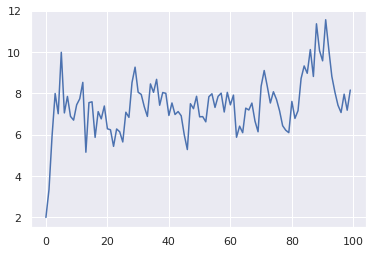

In [0]:
plt.plot(a)

In [0]:
model = ARIMA(a, order=(2,0,0))
model_fit = model.fit(disp=0)
model_fit.params

array([7.26387486, 0.55484425, 0.21907865])